# 1. 데이터 설명: 국가별 수출입 데이터

**데이터 설명**

1. 출처 : [공공데이터 포털](https://www.data.go.kr/)

2. 데이터포맷: xls

3. 수집기간: 2010 ~ 2017년

4. 수집주기: 1년에 1회

5. Column: 기간 , 국가명, 수출건수, 수출금액, 수입건수, 수입금액, 무역수지

6. 화폐단위: 1000 (**$, USD**)


# 2. 데이터 파싱, 전처리

## 1. 한글폰트설정

In [0]:
# colaboratory jupyter 는 linux ubuntu 서버에서 동작하고 있습니다.
# 이 서버에는 현재 한글폰트가 설치되어있지 않습니다.
# 한글폰트를 다운받아서 강제로 지정해야 시각화할때 한글이 깨지지 않습니다
# 아래 코드를 실행하면 자동으로 한글을 설치하게 됩니다.
# 보다 자세한 설명을 원하시는분은 
# https://drive.google.com/open?id=1Z4wXJddBppoPF0Bs75r_iL9UqKQup3EE
# 를 참고하세요

! apt-get install fonts-nanum
! sudo fc-cache -fv
/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf
! cp -rf /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
! rm -rf /content/.cache/matplotlib/*
print('-' * 40)
print("한글폰트 설치완료: 런타임을 재실행하세요")

SyntaxError: ignored

## 2. 구글 드라이브의 데이터 불러오기(goolge api)

In [0]:
# ------------- 데이터 입출력을 위한 google api 호출 -------------

# for google autorization
from google.colab import auth
auth.authenticate_user()
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')


# download data to python
file_id = '1LUAaQ15PZlbpjexQ4WSLRbFr5tFQF66v'                                           # file id를 넣어야 합니다.  https://drive.google.com/open?id=1mdaxfa161UhvgNGKTtmC0gFS1EJpXDru 를 참고
import io
from googleapiclient.http import MediaIoBaseDownload
request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  _, done = downloader.next_chunk()  
downloaded.seek(0)

print('complete')

KeyboardInterrupt: ignored

## 3. Import libraries

In [0]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc
rc('font',family='NanumBarunGothic')
import seaborn as sns
%matplotlib inline
! pip install xlrd
import xlrd

print('All libraries are loaded')

All libraries are loaded


## 4. pandas로 데이터 파싱

### 1) 아래과정대로 parsing을 수행하시오

1. 파일을 담을 데이터 프레임 변수명은 df로 합니다

2. 파일위치는 downloaded로 넣으시면 됩니다

3. 엑셀 시트중 첫번째 시트만을 가져옵니다

4. 인코딩은 utf-8으로 합니다

5. 첫 6행은 건너 뜁니다

6. header(첫행, 보통 칼럼명이 있는 행을 header라고 합니다)는 없음으로 합니다.

7. column을 다음과 같이 줍니다  ['기간', '국가명', '수출건수', '수출금액', '수입건수', '수입금액', '무역수지']

8. df에서 상단 5행만 출력하시오

<br>

다 하시면 다음과 같은 결과가 나와야 합니다

<br>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>기간</th>
      <th>국가명</th>
      <th>수출건수</th>
      <th>수출금액</th>
      <th>수입건수</th>
      <th>수입금액</th>
      <th>무역수지</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2010</td>
      <td>중국</td>
      <td>1,354,546</td>
      <td>116,837,833</td>
      <td>2,241,097</td>
      <td>71,573,603</td>
      <td>45,264,231</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2010</td>
      <td>미국</td>
      <td>706,924</td>
      <td>49,816,058</td>
      <td>3,131,406</td>
      <td>40,402,691</td>
      <td>9,413,367</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2010</td>
      <td>일본</td>
      <td>595,961</td>
      <td>28,176,281</td>
      <td>1,030,548</td>
      <td>64,296,117</td>
      <td>-36,119,835</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2010</td>
      <td>홍콩</td>
      <td>388,650</td>
      <td>25,294,346</td>
      <td>113,449</td>
      <td>1,945,933</td>
      <td>23,348,413</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2010</td>
      <td>싱가포르</td>
      <td>182,618</td>
      <td>15,244,202</td>
      <td>116,626</td>
      <td>7,849,530</td>
      <td>7,394,672</td>
    </tr>
  </tbody>
</table>

In [0]:
df = pd.read_excel(downloaded, sheet_name = 0, encoding = 'utf-8', skiprows = 6, header = None)
df.columns = ['기간', '국가명', '수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
df.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2010,중국,"1,354,546","116,837,833","2,241,097","71,573,603","45,264,231"
1,2010,미국,"706,924","49,816,058","3,131,406","40,402,691","9,413,367"
2,2010,일본,"595,961","28,176,281","1,030,548","64,296,117","-36,119,835"
3,2010,홍콩,"388,650","25,294,346","113,449","1,945,933","23,348,413"
4,2010,싱가포르,"182,618","15,244,202","116,626","7,849,530","7,394,672"


참고로 이데이터...전 보자마자 빡침이 왔습니다.

자주 보시다보면 parsing 해서 데이터만 봐도 어휴 망했음 하는게 보이게 됩니다.

자세한 이유는 아래서 이어서 설명합니다

### 2) df를 copy하여 df2로 선언하고 df2의 describe를 찍어보세요

In [0]:
df2 = df.copy()
df2.describe()

,기간
count,1948.000000
mean,2013.521047
std,2.290434
min,2010.000000
25%,2012.000000
50%,2014.000000
75%,2016.000000
max,2017.000000


응?? 기간 칼럼 말고 나머지 칼럼에 대한 통계가 안나오네요???

df2의 데이터 타입을 찍어보세요

In [0]:
df2.dtypes

기간       int64
국가명     object
수출건수    object
수출금액    object
수입건수    object
수입금액    object
무역수지    object
dtype: object

### 3) 결과 보시면 아시다시피 망함...수출건수 ~ 무역수지의 datatype을 integer로 바꿔야 됩니다.

이거때문에 위에서 망함! 이라고 한겁니다.

이런경우 많음...짜증....

data type이 object 인데다가

심지어 숫자들 중간에 자릿수 표시로 comma(,) 가 들어가 있음...딥빡...

아래와 같이 복잡한 과정을 해서 전처리를 해야됩니다.

<br>

- df2 중에서 수출건수 ~ 무역수지까지의 컬럼만선택

- 바로 위에서 선택한 칼럼들에만 apply와 lambda를 이용하여, data type을 string으로 바꾸고 string의 replace 메써드를 이용하여 comma(,)를 제거

- astype을 이용하여 위에서 수정한 str을 int로 바꿈

<br>

위과정을 코드로 구현한 후, df2의 data type을 출력하고

df2 중에서 상위 5행까지만 출력하세요

In [0]:
df2[df2.columns[2:]] = df2[df2.columns[2:]].apply(lambda x : x.str.replace(',','').astype(int))
     #df2.column의 리스트를 지정
print(df2.dtypes)
df2.head()

기간       int64
국가명     object
수출건수     int64
수출금액     int64
수입건수     int64
수입금액     int64
무역수지     int64
dtype: object


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2010,중국,1354546,116837833,2241097,71573603,45264231
1,2010,미국,706924,49816058,3131406,40402691,9413367
2,2010,일본,595961,28176281,1030548,64296117,-36119835
3,2010,홍콩,388650,25294346,113449,1945933,23348413
4,2010,싱가포르,182618,15244202,116626,7849530,7394672


여기까지 해결하셨으면 df2라는 변수에 전처리된 모든 데이터가 담기게 됩니다

# 3. 예제 : 미국의 무역수지를 예측해 봅시다

## 1) 미국 데이터만 선택

** 아래과정에 따라 미국데이터만 선택하시오**

1. df2를 copy 하여 df3로 선언

2. df3 의 칼럼중 '국가명'이 미국인 것만 선택

3. df3출력

잘되시면 아래와 같이 결과가 나와야 합니다

<br>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>기간</th>
      <th>국가명</th>
      <th>수출건수</th>
      <th>수출금액</th>
      <th>수입건수</th>
      <th>수입금액</th>
      <th>무역수지</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>2010</td>
      <td>미국</td>
      <td>706924</td>
      <td>49816058</td>
      <td>3131406</td>
      <td>40402691</td>
      <td>9413367</td>
    </tr>
    <tr>
      <th>242</th>
      <td>2011</td>
      <td>미국</td>
      <td>719599</td>
      <td>56207703</td>
      <td>4137884</td>
      <td>44569029</td>
      <td>11638673</td>
    </tr>
    <tr>
      <th>481</th>
      <td>2012</td>
      <td>미국</td>
      <td>750261</td>
      <td>58524559</td>
      <td>4574710</td>
      <td>43340962</td>
      <td>15183597</td>
    </tr>
    <tr>
      <th>723</th>
      <td>2013</td>
      <td>미국</td>
      <td>807522</td>
      <td>62052488</td>
      <td>5767864</td>
      <td>41511916</td>
      <td>20540572</td>
    </tr>
    <tr>
      <th>967</th>
      <td>2014</td>
      <td>미국</td>
      <td>838277</td>
      <td>70284872</td>
      <td>6657290</td>
      <td>45283254</td>
      <td>25001618</td>
    </tr>
    <tr>
      <th>1211</th>
      <td>2015</td>
      <td>미국</td>
      <td>851101</td>
      <td>69832103</td>
      <td>5621722</td>
      <td>44024430</td>
      <td>25807672</td>
    </tr>
    <tr>
      <th>1456</th>
      <td>2016</td>
      <td>미국</td>
      <td>900222</td>
      <td>66462312</td>
      <td>6139279</td>
      <td>43215930</td>
      <td>23246382</td>
    </tr>
    <tr>
      <th>1704</th>
      <td>2017</td>
      <td>미국</td>
      <td>843152</td>
      <td>63316271</td>
      <td>7162363</td>
      <td>46371664</td>
      <td>16944606</td>
    </tr>
  </tbody>
</table>

In [0]:
df3 = df2.copy()
df3 = df3[df3['국가명'] == '미국']
df3

NameError: ignored

## 2) 근데....어떻게 분석해야되지???

자... 이제부터가 진짜 문제입니다. 고민의 시간이 왔습니다.

무역수지를 **'예측'** 해야 하므로, regression을 써야 할것 같습니다.

위데이터에서 무역수지를 예측하는 regression을 구현하는 방법은 크게 2가지 입니다

<br>

**1. [기간, 수출건수, 수출금액, 수입건수, 수입금액] 을 전부 때려넣고 무역수지를 예측한다.**
- X = [기간, 수출건수, 수출금액, 수입건수, 수입금액]<br>
- Y = 무역수지<br><u>아 이러면 input이 5개인 multivariate regression이네요</u>

<br>

**2. [기간, 수출건수, 수출금액, 수입건수, 수입금액] 중 하나의 변수만으로 무역수지를 예측한다.**

- X = 위 변수중 1개<br>
- Y = 무역수지<br><u>아 이러면 input이 1개인 simple regression 입니다</u>

<br>

국가명 칼럼은 제외입니다.(미국만 선택했으니 어차피 다 미국이죠?)

둘중 뭐가 맞냐구요? 알 수 없습니다. 성능은 구현해봐야 알죠.

변수가 많다고 꼭 예측을 잘하는것도 아닙니다.

정답은 없으며 이것을 정하는것은 구현 결과에 따른 여러분의 판단에 따릅니다.


## 3) 일단은 예제로 Simple regression(단순회귀) 부터 해봅시다

자...일단 simple regression 하려고 그러면 문제가 또 있습니다.

<br>

- **[기간, 수출건수, 수출금액, 수입건수, 수입금액] 중 하나로 무역수지를 예측해야 하는데,<br>
무엇으로 무역수지를 예측할것인가?**

<br>

어렵죠?

이를 해결하려면 이것이 반드시 필요합니다.

<br>

* <b> '어떠한 칼럼이 무역수지를 가장 잘 예측할것이다' 를 만족시킬수 있는 통계적 근거가 필요하다</b>

<br>

자 , 그럼 '가장 잘 예측 한다' 는 것은 어떻게 정의해야 합니까?

네? 하나씩 넣어보고 분석 돌려봐야 알거라고요? 하지만....더 곰곰히 생각해 보면...

우리가 배운 통계중에 하나로 이것을 구해 낼수 있습니다.

아래 질문에 답을 할수 있으면 됩니다

<br>

- 위 칼럼들 중에 무역수지와 **<u> 가장 유사한패턴을 가지는 데이터는 어떤 녀석입니까? </u>**

<br>

정답을 말씀드리면, 수출금액이 가장 유사한 패턴을 나타냅니다

위 질문에 대답할수 있는 통계수치를 출력하도록 코드를 구현해보세요

In [0]:
df3.corr()

,기간,수출건수,수출금액,수입건수,수입금액,무역수지
기간,1.000000,0.921695,0.779841,0.909832,0.612861,0.696566
수출건수,0.921695,1.000000,0.878249,0.861800,0.407724,0.873605
수출금액,0.779841,0.878249,1.000000,0.834777,0.558061,0.965107
수입건수,0.909832,0.861800,0.834777,1.000000,0.667019,0.742169
수입금액,0.612861,0.407724,0.558061,0.667019,1.000000,0.321299
무역수지,0.696566,0.873605,0.965107,0.742169,0.321299,1.000000


In [0]:
# 무역수지와 수출금액 간의 pearson 상관의 p-value까지 보고싶으면

from scipy.stats import pearsonr

pearsonr(df3['무역수지'].values, df3['수출금액'].values)

(0.9651065571285348, 0.00010345131833976614)

## 4) 엥? 아직도 필요한게 있나??

있습니다 하나더 고려해야 될것이.

그전에 일단, 

df3에서 수출건수, 무역수지 두 칼럼만 가져와서 이것을 df4로 선언하고 df4를 출력해보세요

다음과 같은 결과가 나와야 합니다.

<br>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>수출금액</th>
      <th>무역수지</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>49816058</td>
      <td>9413367</td>
    </tr>
    <tr>
      <th>242</th>
      <td>56207703</td>
      <td>11638673</td>
    </tr>
    <tr>
      <th>481</th>
      <td>58524559</td>
      <td>15183597</td>
    </tr>
    <tr>
      <th>723</th>
      <td>62052488</td>
      <td>20540572</td>
    </tr>
    <tr>
      <th>967</th>
      <td>70284872</td>
      <td>25001618</td>
    </tr>
    <tr>
      <th>1211</th>
      <td>69832103</td>
      <td>25807672</td>
    </tr>
    <tr>
      <th>1456</th>
      <td>66462312</td>
      <td>23246382</td>
    </tr>
    <tr>
      <th>1704</th>
      <td>63316271</td>
      <td>16944606</td>
    </tr>
  </tbody>
</table>

In [0]:
df4 = df3[['수출금액', '무역수지']]
df4

,수출금액,무역수지
1,49816058,9413367
242,56207703,11638673
481,58524559,15183597
723,62052488,20540572
967,70284872,25001618
1211,69832103,25807672
1456,66462312,23246382
1704,63316271,16944606


df4를 그려 봅시다.

아직 우리는 시각화를 배우지 않았으니 일단 아래 코드를 실행해봅시다

Text(0, 0.5, '무역수지')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


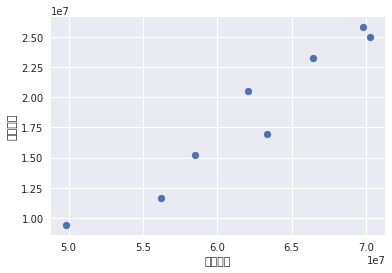

In [0]:
# 아직우리는 시각화를 배우진 않았지만, 일단 따라 그려봅시다
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc
rc('font',family='NanumBarunGothic')
import seaborn as sns
%matplotlib inline


plt.scatter(df4['수출금액'], df4['무역수지'])
plt.xlabel('수출금액')
plt.ylabel('무역수지')

아!

기억나실겁니다 이제

regression 을 할때 하나더 고려해야 하는것

<br>

- <b>데이터의 관계는 선형적인가?</b>

<br>

X인 수출금액과 Y인 무역수지간의 관계는 위와같이 대체로 선형적으로 보이네요.

## 5) 총정리 해봅시다!

자...위 사항들을 정리해 볼까요.

1. 예측을 할것이다 = regression을 써야한다.

2. 그중에서 X(input)과 Y(output)의 각 변수 갯수가 둘다 1개짜리다 = simple regression을 써야한다.

3. X와 Y의 관계가 선형적이다 = simple linear regression을 써야한다.

자. 이제 정리가 다 됬네요.

이제 선형회귀 하면 됩니다!

## 6) 머신러닝으로 학습시켜서, 선형회귀 합시다

현재 우리의 data는 df4라는 변수에 dataframe 자료형으로 들어와 있습니다.

이것을 각각 잘라서(slicing) X와 Y에 넣고 train 시켜야 겠죠?

구현하는 코드를 짜보세요. 이미 공유해드린 강의자료의 코드를 보면서 진행하시면 됩니다.

In [0]:
import tensorflow as tf

df4[:]['수출금액'].values

# placeholder(X)

# W
# B

array([49816058, 56207703, 58524559, 62052488, 70284872, 69832103,
       66462312, 63316271])

In [0]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

xdata = df4['수출금액'].values
ydata = df4['무역수지'].values



# ---여기 이후로는 똑같겠죠?---


# Our hypothesis XW+b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean((tf.square(hypothesis - Y)))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(2001):
    cost_val, W_val, b_val, _ = \
        sess.run([cost, W, b, train],
                 feed_dict={X: xdata, Y: ydata})     # 마지막에 여기만 다릅니다!
#     print(step, cost_val, W_val, b_val)
    if step % 100 == 0:
        print(step, cost_val, W_val, b_val)

Instructions for updating:
Colocations handled automatically by placer.
0 1.4149095e+16 [-1.4839213e+14] [-2372050.2]
100 nan [nan] [nan]
200 nan [nan] [nan]
300 nan [nan] [nan]
400 nan [nan] [nan]
500 nan [nan] [nan]
600 nan [nan] [nan]
700 nan [nan] [nan]
800 nan [nan] [nan]
900 nan [nan] [nan]
1000 nan [nan] [nan]
1100 nan [nan] [nan]
1200 nan [nan] [nan]
1300 nan [nan] [nan]
1400 nan [nan] [nan]
1500 nan [nan] [nan]
1600 nan [nan] [nan]
1700 nan [nan] [nan]
1800 nan [nan] [nan]
1900 nan [nan] [nan]
2000 nan [nan] [nan]


근데...이거 아마 잘 안되실겁니다. cost가 하늘을 찌르죠??

이 이유에 대해서는 여러가지 것들을 추가 고려 해야되고 뭔가 전처리를 더 해야되는데. 

그건 이따 다시 설명 드릴겁니다.

아래는 참고용 코드입니다.

### 부록 - 아래코드는 그냥 참고만

일단 df4를 copy하여 df5로 선언하고,

df5의 각 칼럼의 데이터를 minmax scaler로 0~1사이 비율값으로 리스케일링합니다

rescaling 한 df5를 가지고 x,y를 선언해줍니다

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

df5 = df4.copy()

x_data = scaler_x.fit_transform(df5['수출금액'].values.reshape(-1,1)).flatten()
y_data = scaler_y.fit_transform(df5['무역수지'].values.reshape(-1,1)).flatten()

바로 위의 xdata와 ydata로 동일한 코드의 선형회귀 알고리즘에 feed dict에 넣어서 해보세요 어떻게 됩니까?

In [0]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis XW+b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean((tf.square(hypothesis - Y)))

# Minimize
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(2001):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train], feed_dict={X: x_data, Y: y_data})     # 여기에 xdata랑 ydata 넣어줘야겠죠
    if step % 100 == 0:
        print(step, cost_val, W_val, b_val)

어떻게 되긴 됬는데.... 복잡하기도 복잡하거니와 성능도 보장못함

이럴땐 어떡 하냐고요?

선형회귀정도는 굳이 머신러닝을 안해도 아래와같이 간단하게 구현해도 됩니다.

In [0]:
# 머신러닝을 하지않고, 우리가 기존에 배웠던 LMS를 이용하여 그냥 선형회귀 해봄

from scipy import stats


#선형회귀 결과
slope, intercept, r_value, p_value, std_err = stats.linregress(xdata,ydata)
result = stats.linregress(xdata,ydata)


# 시각화
plt.plot(xdata, ydata, 'o', label='original data')
plt.plot(xdata, intercept + slope*xdata, 'r', label='fitted line')
plt.xlabel('수출금액')
plt.ylabel('무역수지')
plt.legend()
result

이에 따르면 선형회귀 결과는 다음과 같습니다.

**Y = 0.84 X - 34012917.22761516**

df4를 일단 다시 출력해봅시다

In [0]:
df4

df4의 xdata들을 넣고 비교해봅시다 성능을

In [0]:
# scipy library의 stats(일반적 통계 분석 알고리즘) 을 이용하여 구현한 예측모델

def lin_reg(x):
  return (x * 0.84 - 34012917.22761516).reshape(-1,1)

lin_reg(xdata)

In [0]:
# tensorflow (머신러닝) 을 이용하여 구현한 예측모델

result = sess.run(hypothesis, feed_dict={X : x_data})
scaler_y.inverse_transform(result.reshape(-1,1))

# 4. 그래서 뭘 말하고 싶은 거냐??

제가 이 예제를 보면서 말씀드리고 싶은것은 두가지입니다.

## 1) 보시다시피, 머신러닝은 완벽하지 않다

보시다시피 일부 경우에서는 전통적인 통계가 더 나은경우도 많습니다.

모든 분석에 머신러닝을 한다는것은 어리석은 생각입니다. 

불가능하기도 하구요. 학습시킬때 이것저것 복잡하게 고려해야 할것도 많습니다.

전통적인 통계와 머신러닝 기법의 한계를 모두 알게되면, 

각 분석 목적에 따라 좀더 효율적이고 다양한 방법으로 데이터를 분석하고 결과를 얻을수 있게 됩니다

## 2) 알고리즘을 먼저 정하는 것이 아니고, 분석목적을 먼저 정의해야 한다

이제까지 분석한 전체 흐름을 봅시다

1. 데이터 파싱, 기본적인 데이터 전처리

2. 분석 목적 정의, 분석에 쓸 변수 정의

3. 분석 방법 및 알고리즘 정의. 

4. 분석 진행 및 검증. 시각화

위 분석과정에서,

**<u>제가 알고리즘을 먼저 정의했나요? 아닙니다.</u>**

계속해서 말씀드리지만 그전에 중요한 부분들이 많이 있습니다.

특히 중요한것은 

**<u>2. 분석 목적 정의, 분석에 쓸 변수 정의</u>**

입니다.

분석 요구조건에 따라 

- 원하는 결과값은 정확히 무엇인가? 

- 결과값을 내기 위하여 어떠한 변수를 몇개 쓸것인가? 

- 구체적으로 어떻게 문제사항에 대한 해결방법을 정의할것인가?

가 달라지며, 알고리즘은 위에것들이 정의되지 못하면 무엇을 쓸지 알수없습니다.

<br>

분석 요구조건과 데이터를 보고 위 예제처럼 어떠한 기법을 쓸것인가가 머리속에 떠오르려면, 

여러분들이 기초강의에서 들은 통계 기초지식들이 반드시 필요합니다. 지금 보시다시피요.

기초강의때부터 누차 강조해드렸지만

데이터를 분석할때 가장 중요한것은 **<u>데이터와 분석목적</u>** 이며,

알고리즘과 코딩능력은 그 다음입니다.